# Pandas - Data Science with Python

Numpy and numpy arrays are our tool of choice for numeric data that resembles vectors, matrices (and higher dimensional tensors).

Where data is gathered from experiments, and in particular where we want to extract meaning from the combination of different data sources, and where data is often incomplete, the pandas library offers a number of useful tools (and has become a standard tool for data scientists).

In this section, we introduce the basics of Pandas.

In particular, we introduce the two key data types in Pandas: the ``Series`` and the ``DataFrame`` objects.

By convention, the `pandas` library is imported under the name `pd` (the same way that `numpy` is imported under the name `np`:

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
import pandas as pd

## Motivational example (Series)


Imagine we are working on software for a greengrocer or supermarket, and need to track the number of apples (10), oranges(3) and bananas (22) that are available in the supermarket. 



In [3]:
stock_dic = {'apple': 10, 
             'orange': 3,
             'banana': 22}

In a way, the keys of the dictionary contain the stock labels and the values contain the actual values:

To retrieve (or change) the value for `apple`, we use `apple` as the key and retrieve the value through the dictionary's indexing notation:

In [4]:
stock_dic['apple']

10

And we can summarise the stock as follows:

In [5]:
for label in stock_dic:
    print(f'{label:10s} : {stock_dic[label]:4d}')

apple      :   10
orange     :    3
banana     :   22


The Pandas Series object is similar to a dictionary, but with improvements for the given problem:

* the order of the items is maintained
* the values have to have the same type (higher execution performance)
* a (large) number of convenience functionality, for example to deal with missing data, time series, sorting, plotting, and more 

## Pandas `Series`

### Stock example - `Series`

We can create a `Series` object - for example - from a dictionary:

In [6]:
stock = pd.Series({'apple': 10, 
                   'orange': 3,
                   'banana': 22})

In [8]:
stock

apple     10
orange     3
banana    22
dtype: int64

In [12]:
stock['potato'] = 31


In [13]:
stock

apple     10
orange     3
banana    22
potato    31
dtype: int64

<Axes: >

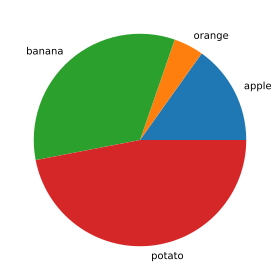

In [18]:
stock.plot(kind='pie')

<Axes: >

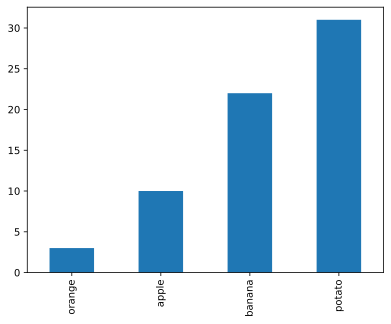

In [22]:
stock.sort_values().plot(kind='bar')

In [21]:
stock.sort_index()

apple     10
banana    22
orange     3
potato    31
dtype: int64

In [25]:
len(stock)

4

In [26]:
stock.shape

(4,)

In [27]:
stock.describe()

count     4.0000
mean     16.5000
std      12.4499
min       3.0000
25%       8.2500
50%      16.0000
75%      24.2500
max      31.0000
dtype: float64

In [28]:
stock.memory_usage()

236

In [29]:
stock.values.nbytes

32

## Create Series from list



In [35]:
stock = pd.Series([10, 3, 22], index=['apple', 'orange', 'banana'])

In [31]:
stock

apple     10
orange     3
banana    22
dtype: int64

In [32]:
stock = pd.Series([10, 3, 22])

In [33]:
stock

0    10
1     3
2    22
dtype: int64

However, an index can be added subsequently:

In [ ]:
stock.index = ['apple', 'orange', 'banana']

In [ ]:
stock

## Plotting data

<Axes: >

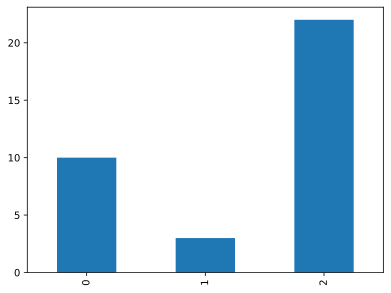

In [34]:
stock.plot.bar()

To tailor the plot, we can get the axis object and modify it subsequently:

<Axes: >

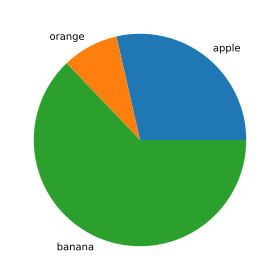

In [36]:
stock.plot(kind='pie')

<Axes: >

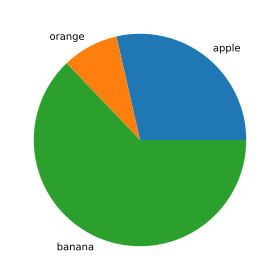

In [37]:
stock.plot.pie()

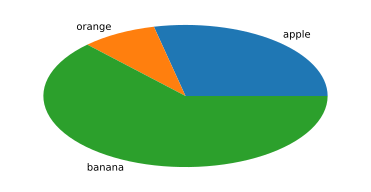

In [38]:
ax = stock.plot.pie()
ax.set_aspect(0.5)

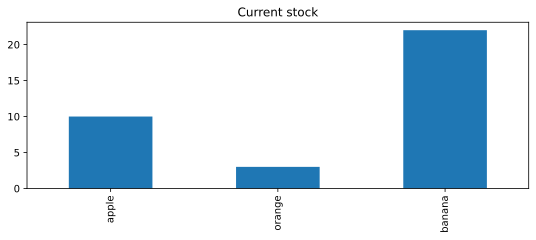

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9, 3))
stock.plot.bar(ax=ax)
ax.set_title("Current stock");

We can also fetch the data from the series and drive the plotting "manually" ourselves:

In [46]:
d = stock.to_dict()

In [47]:
d.keys()

dict_keys(['apple', 'orange', 'banana'])

In [48]:
d.values()

dict_values([10, 3, 22])

In [42]:
import matplotlib.pyplot as plt

names = list(stock.index)
values = list(stock.values)

In [43]:
names

['apple', 'orange', 'banana']

In [44]:
values

[10, 3, 22]

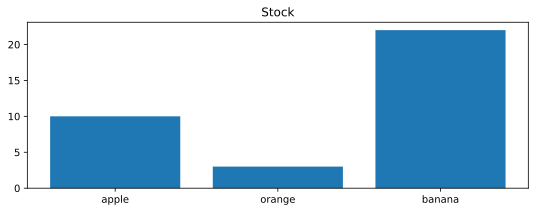

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3))
ax.bar(names, values)
ax.set_title('Stock');

## Missing values

"Real" data sets tend to be incomplete. Dealing with missing values is an important topic in data science. The agreement in Pandas is that the special floating point value "NaN" (standing for `N`ot `a` `N`umber) represents missing data points. For example, if we have a table for the stock, but we don't know the value for `apple`, we would replace it with `NaN`. 

The special `Nan` value in Python can be created using `float('nan')` or using `numpy.nan` if the `numpy` module is imported.

In [56]:
float('inf')

inf

In [51]:
stock['apple'] = float('nan')

In [52]:
stock

apple      NaN
orange     3.0
banana    22.0
dtype: float64

In [53]:
stock.sum()

25.0

In [54]:
stock.dropna()

orange     3.0
banana    22.0
dtype: float64

## Series data access: explicit and implicit (`loc` and `iloc`)

In [57]:
stock = pd.Series({'apple': 10, 
                   'orange': 3,
                   'banana': 22,
                   'cucumber' : 1,
                   'potato' : 110})

In [58]:
stock

apple        10
orange        3
banana       22
cucumber      1
potato      110
dtype: int64

### Indexing

We can access single values through their index as if the stock Series object would be a dictionary:

In [59]:
stock['banana']

22

In [60]:
stock[2]

22

There is an equivalent and recommended way of using this retrieval using the `loc` (for LOCation?) attribute:

In [61]:
stock.loc['banana']

22

Can also use the index (as for sequencens):

In [63]:
stock.iloc[-1]

110

- can become very confusing if the actual index of the object consists of integers. 
- recommendation: use `iloc` (ImplicitLOCation) attribute

In [ ]:
stock.iloc[2]

### Slicing

In [75]:
stock.mean()

29.2

In [76]:
stock

apple        10
orange        3
banana       22
cucumber      1
potato      110
dtype: int64

In [68]:
stock["cucumber":"orange":-1]

cucumber     1
banana      22
orange       3
dtype: int64

### Data manipulation

Numerical operations on the series object can be carried for all data values at the same time inthe same way that numpy arrays are processed:

In [70]:
2*stock

apple        20
orange        6
banana       44
cucumber      2
potato      220
dtype: int64

In [71]:
stock - stock.mean()

apple      -19.2
orange     -26.2
banana      -7.2
cucumber   -28.2
potato      80.8
dtype: float64

In [74]:
stock.values - stock.values.mean()

array([-19.2, -26.2,  -7.2, -28.2,  80.8])

In [ ]:
import numpy as np

In [ ]:
np.sqrt(stock)

Where preferred, we can extract the numpy array and work with that:

In [ ]:
type(stock.values)

### Import and Export



In [77]:
stock.to_csv('stock.csv', header=False)

In [78]:
!cat stock.csv

apple,10
orange,3
banana,22
cucumber,1
potato,110


In [ ]:
stock.to_excel('stock.xlsx', header=False)

We can also create a $\LaTeX$ representation of the table:

In [79]:
stock.to_latex()

'\\begin{tabular}{lr}\n\\toprule\n & 0 \\\\\n\\midrule\napple & 10 \\\\\norange & 3 \\\\\nbanana & 22 \\\\\ncucumber & 1 \\\\\npotato & 110 \\\\\n\\bottomrule\n\\end{tabular}\n'

## Data Frame

### Stock Example - `DataFrame`

After having introduced the `Series` object above, we will focus on the second important type in pandas: the `DataFrame`.

As a first description, we could say that the `DataFrame` is similar to a (2d) spreadsheet: it contains rows and columns.

The series object we have studied above is a special case of the `DataFrame`, where the `DataFrame` has only one column.

In [87]:
stock = pd.Series({'apple': 10, 
                   'orange': 3,
                   'banana': 22,
                   'cucumber' : 1,
                   'potato' : 110})
stock

apple        10
orange        3
banana       22
cucumber      1
potato      110
dtype: int64

In [94]:
price = pd.Series({'apple':0.1, 'banana': 0.50, 'cucumber' : 0.99, 
                   'potato' : 0.17, 'orange': 1.76})
price

apple       0.10
banana      0.50
cucumber    0.99
potato      0.17
orange      1.76
dtype: float64

The `DataFrame` object allows us to treat the two series together:

In [95]:
shop = pd.DataFrame({'stock' : stock, 'price' : price})


In [96]:
shop

stock  price
apple        10   0.10
banana       22   0.50
cucumber      1   0.99
orange        3   1.76
potato      110   0.17

In [84]:
df = shop

In [86]:
df.columns

Index(['stock', 'price'], dtype='object')

Because both `Series` objects had the same `index` elements, our data is nicely aligned in the `DataFrame` with name `shop`, even though the data was stored in different order in the `price` and `stock`.

### Accessing data in a DataFramea


In [ ]:
shop

The data frame has an *index* which is the same for all columns, and shown in bold in the left most column. We can also ask for it:

In [ ]:
shop.index

In [ ]:
shop.columns

### Extracting columns of data

Using the column names, we can extract one column into a Series object using the index operator (`[]`):

In [100]:
shop['stock']

apple        10
banana       22
cucumber      1
orange        3
potato      110
Name: stock, dtype: int64

In [103]:
shop

stock  price
apple        10   0.10
banana       22   0.50
cucumber      1   0.99
orange        3   1.76
potato      110   0.17

In [104]:
shop.loc['apple':'cucumber']

stock  price
apple        10   0.10
banana       22   0.50
cucumber      1   0.99

In [ ]:
shop['stock']

In [114]:
shop['nutriscore'] = ["A", "B", float('nan'), "C", "D"]

In [115]:
shop

stock  price nutriscore
apple        10   0.10          A
banana       22   0.50          B
cucumber      1   0.99        NaN
orange        3   1.76          C
potato      110   0.17          D

In [108]:
shop['nutriscore'] = ["A", "A", "B", "D", ]

In [111]:
shop

stock  price nutriscore
apple        10   0.10          A
banana       22   0.50          A
cucumber      1   0.99          B
orange        3   1.76          D
potato      110   0.17          D


### Extracting rows of data

We have two options of extracting a row of data. 

First, explicit indexing using the label of the index in that row:

In [ ]:
shop.loc['apple']             # single row is returned as series

In [ ]:
shop.loc['banana':'cucumber']  # multiple rows are returned as DataFrame

Second, we can use the implicit indexing (as for Series objects):

In [117]:
shop.iloc[1]

stock          22
price         0.5
nutriscore      B
Name: banana, dtype: object

### Data manipulation with `shop`

In [119]:
shop

stock  price nutriscore
apple        10   0.10          A
banana       22   0.50          B
cucumber      1   0.99        NaN
orange        3   1.76          C
potato      110   0.17          D

In [118]:
shop['price'] * shop['stock']


apple        1.00
banana      11.00
cucumber     0.99
orange       5.28
potato      18.70
dtype: float64

In [120]:
shop['value'] = shop['price'] * shop['stock']


In [121]:
shop

stock  price nutriscore  value
apple        10   0.10          A   1.00
banana       22   0.50          B  11.00
cucumber      1   0.99        NaN   0.99
orange        3   1.76          C   5.28
potato      110   0.17          D  18.70

In [127]:
shop2 = shop.transpose()

In [128]:
shop2

apple banana cucumber orange potato
stock         10     22        1      3    110
price        0.1    0.5     0.99   1.76   0.17
nutriscore     A      B      NaN      C      D
value        1.0   11.0     0.99   5.28   18.7

In [132]:
shop['value'].describe()

count     5.00000
mean      7.39400
std       7.53645
min       0.99000
25%       1.00000
50%       5.28000
75%      11.00000
max      18.70000
Name: value, dtype: float64

In [129]:
shop['value'].sum()

36.97

In [ ]:
shop.transpose()

## Example: European population 2017

Here is a second example to demonstrate some use cases of pandas DataFrames.

First, we get the data. It is originally from EUROSTAT (reference "demo_gind")

In [133]:
!curl https://fangohr.github.io/data/eurostat/population2017/eu-pop-2017.csv > eu-pop-2017.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1087  100  1087    0     0   4986      0 --:--:-- --:--:-- --:--:--  4986


In [134]:
!head eu-pop-2017.csv

geo,pop17,pop18,births,deaths
Belgium ,11351727,11413058,119690,109666
Bulgaria,7101859,7050034,63955,109791
Czechia,10578820,10610055,114405,111443
Denmark,5748769,5781190,61397,53261
Germany,82521653,82850000,785000,933000
Estonia ,1315634,1319133,13784,15543
Ireland,4784383,4838259,62084,30324
Greece,10768193,10738868,88523,124530
Spain,46527039,46659302,390024,421269


In [135]:
df = pd.read_csv('eu-pop-2017.csv')

In [136]:
df

geo     pop17     pop18  births  deaths
0         Belgium   11351727  11413058  119690  109666
1         Bulgaria   7101859   7050034   63955  109791
2          Czechia  10578820  10610055  114405  111443
3          Denmark   5748769   5781190   61397   53261
4          Germany  82521653  82850000  785000  933000
5         Estonia    1315634   1319133   13784   15543
6          Ireland   4784383   4838259   62084   30324
7           Greece  10768193  10738868   88523  124530
8            Spain  46527039  46659302  390024  421269
9          France   66989083  67221943  767691  603141
10         Croatia   4154212   4105493   36556   53477
11           Italy  60589445  60483973  458151  649061
12          Cyprus    854802    864236    9229    5997
13          Latvia   1950116   1934379   20828   28757
14       Lithuania   2847904   2808901   28696   40142
15      Luxembourg    590667    602005    6174    4263
16         Hungary   9797561   9778371   94646  131877
17           Malta    460297    475701    4319    3571
18     Netherlands  17081507  17181084  169200  150027
19         Austria   8772865   8822267   87633   83270
20          Poland  37972964  37976687  401982  402852
21        Portugal  10309573  10291027   86154  109586
22         Romania  19644350  19523621  189474  260599
23        Slovenia   2065895   2066880   20241   20509
24        Slovakia   5435343   5443120   57969   53914
25         Finland   5503297   5513130   50321   53722
26          Sweden   9995153  10120242  115416   91972
27  United Kingdom  65808573  66238007  755043  607172

The meaning of the colums, we have to get from metada information. In this case, we have the following description of the data:

- **geo**: the country in question
- **pop17**: the population count of that country as of 1 January 2017
- **pop18**: the population count of that country as of 1 January 2018
- **births**: the number of (live) births in the country during the year 2017
- **deaths**: the number of deaths in that country during the year 2017

The data is provided for all of the 28 European Union members (as of 2017).

We want to use the country as the country name as the index. 

In [137]:
df2 = df.set_index('geo')

In [138]:
df2.head()

pop17     pop18  births  deaths
geo                                         
Belgium   11351727  11413058  119690  109666
Bulgaria   7101859   7050034   63955  109791
Czechia   10578820  10610055  114405  111443
Denmark    5748769   5781190   61397   53261
Germany   82521653  82850000  785000  933000

In [139]:
df = df2

We explore the data by plotting some of it:

<Axes: xlabel='geo'>

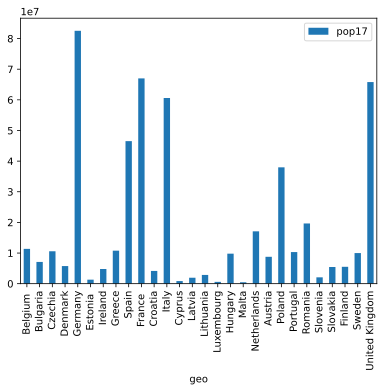

In [140]:
df.plot(kind='bar', y='pop17')

The above shows the population as of 1 Jan 2017. 

We'll try to improve this in two ways:

- we want to count population in millions. 

- it would be interesting to sort the countries in order of size for this plot.



In [141]:
df_millions = df / 1e6

In [142]:
df_millions

pop17      pop18    births    deaths
geo                                                     
Belgium         11.351727  11.413058  0.119690  0.109666
Bulgaria         7.101859   7.050034  0.063955  0.109791
Czechia         10.578820  10.610055  0.114405  0.111443
Denmark          5.748769   5.781190  0.061397  0.053261
Germany         82.521653  82.850000  0.785000  0.933000
Estonia          1.315634   1.319133  0.013784  0.015543
Ireland          4.784383   4.838259  0.062084  0.030324
Greece          10.768193  10.738868  0.088523  0.124530
Spain           46.527039  46.659302  0.390024  0.421269
France          66.989083  67.221943  0.767691  0.603141
Croatia          4.154212   4.105493  0.036556  0.053477
Italy           60.589445  60.483973  0.458151  0.649061
Cyprus           0.854802   0.864236  0.009229  0.005997
Latvia           1.950116   1.934379  0.020828  0.028757
Lithuania        2.847904   2.808901  0.028696  0.040142
Luxembourg       0.590667   0.602005  0.006174  0.004263
Hungary          9.797561   9.778371  0.094646  0.131877
Malta            0.460297   0.475701  0.004319  0.003571
Netherlands     17.081507  17.181084  0.169200  0.150027
Austria          8.772865   8.822267  0.087633  0.083270
Poland          37.972964  37.976687  0.401982  0.402852
Portugal        10.309573  10.291027  0.086154  0.109586
Romania         19.644350  19.523621  0.189474  0.260599
Slovenia         2.065895   2.066880  0.020241  0.020509
Slovakia         5.435343   5.443120  0.057969  0.053914
Finland          5.503297   5.513130  0.050321  0.053722
Sweden           9.995153  10.120242  0.115416  0.091972
United Kingdom  65.808573  66.238007  0.755043  0.607172

<Axes: xlabel='geo'>

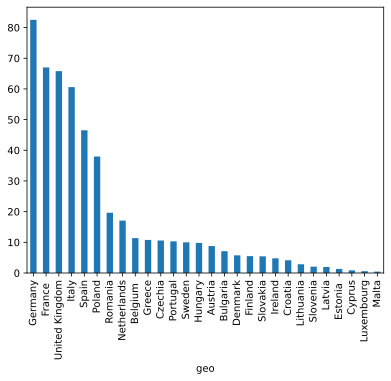

In [143]:
df_millions['pop17'].sort_values(ascending=False).plot(kind='bar')

In [146]:
df_millions.head()

pop17      pop18    births    deaths
geo                                               
Belgium   11.351727  11.413058  0.119690  0.109666
Bulgaria   7.101859   7.050034  0.063955  0.109791
Czechia   10.578820  10.610055  0.114405  0.111443
Denmark    5.748769   5.781190  0.061397  0.053261
Germany   82.521653  82.850000  0.785000  0.933000

<Axes: xlabel='geo'>

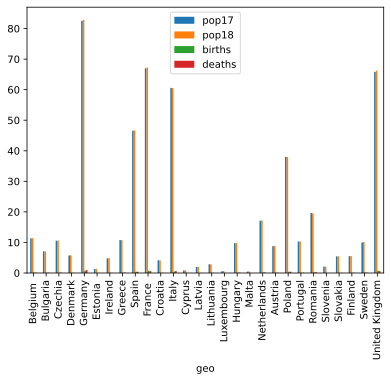

In [145]:
df_millions.plot(kind='bar')

Alternatively, we could also create a plot for the whole data frame, but say that the `pop17` is the column for sorting, and that we want to plot only the column with `pop17`:

In [ ]:
df_millions.sort_values(by='pop17').plot(kind='bar', y='pop17')

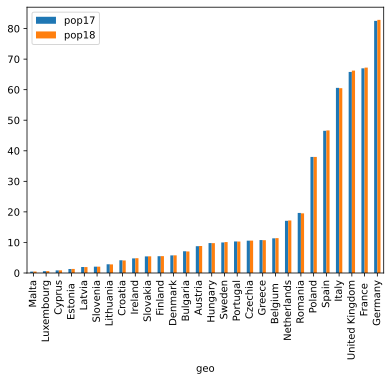

In [147]:
ax = df_millions.sort_values(by='pop17').plot(kind='bar', y=['pop17', 'pop18'])

We can also fine tune the plot with the usual `matplotlib` commands:

In [ ]:
ax = df_millions.sort_values(by='pop17').plot(kind='bar', y='pop17', figsize=(8, 4))
ax.set_ylabel("population 2017 [in millions]")
ax.grid()
ax.set_xlabel(None);  # get rid of default label for x-axis ('geo')

Based on the number of births and deaths, we can compute change in population for each country for 2017. This is sometimes called the "natural-change":

In [149]:
df['natural-change'] = df['births'] - df['deaths']

In [150]:
df['natural-change'].sort_values()

geo
Italy            -190910
Germany          -148000
Romania           -71125
Bulgaria          -45836
Hungary           -37231
Greece            -36007
Spain             -31245
Portugal          -23432
Croatia           -16921
Lithuania         -11446
Latvia             -7929
Finland            -3401
Estonia            -1759
Poland              -870
Slovenia            -268
Malta                748
Luxembourg          1911
Czechia             2962
Cyprus              3232
Slovakia            4055
Austria             4363
Denmark             8136
Belgium            10024
Netherlands        19173
Sweden             23444
Ireland            31760
United Kingdom    147871
France            164550
Name: natural-change, dtype: int64

From this, we can see that the population change due to births and deaths in Italy and Germany is decreasing most in absolute terms.

To relate this to the overall size of the population, one often uses rates per year and per 1000 people in the country, such as the birth rate per 1000 inhabitants [1] (and death rate accordingly):

[1] https://en.wikipedia.org/wiki/Birth_rate

In [151]:
df.head()

pop17     pop18  births  deaths  birth-rate  death-rate  \
geo                                                                    
Belgium   11351727  11413058  119690  109666   10.543770    9.660733   
Bulgaria   7101859   7050034   63955  109791    9.005389   15.459473   
Czechia   10578820  10610055  114405  111443   10.814533   10.534540   
Denmark    5748769   5781190   61397   53261   10.680026    9.264766   
Germany   82521653  82850000  785000  933000    9.512655   11.306123   

          natural-change  
geo                       
Belgium            10024  
Bulgaria          -45836  
Czechia             2962  
Denmark             8136  
Germany          -148000

In [152]:
df['birth-rate'] = df['births'] / df['pop17'] * 1000
df['death-rate'] = df['deaths'] / df['pop17'] * 1000
df['natural-change-rate'] = df['natural-change'] / df['pop17'] * 1000

In [153]:
df.head()

pop17     pop18  births  deaths  birth-rate  death-rate  \
geo                                                                    
Belgium   11351727  11413058  119690  109666   10.543770    9.660733   
Bulgaria   7101859   7050034   63955  109791    9.005389   15.459473   
Czechia   10578820  10610055  114405  111443   10.814533   10.534540   
Denmark    5748769   5781190   61397   53261   10.680026    9.264766   
Germany   82521653  82850000  785000  933000    9.512655   11.306123   

          natural-change  natural-change-rate  
geo                                            
Belgium            10024             0.883037  
Bulgaria          -45836            -6.454085  
Czechia             2962             0.279993  
Denmark             8136             1.415260  
Germany          -148000            -1.793469

We can now look at the natural rate of change of population for each country

In [ ]:
ax = df.sort_values(by='natural-change-rate').plot(kind='bar', 
                                                   y='natural-change-rate', 
                                                   figsize=(8, 4))
ax.set_title("Natural change due to births and deaths per 1000 in 2017");

We can show the data together with the underlying birth and death rate data:

In [ ]:
tmp = df.sort_values(by='natural-change-rate')

fig, axes = plt.subplots(2, 1, figsize=(8, 5))

tmp.plot(kind='bar', y=['natural-change-rate'], sharex=True, ax=axes[0])
axes[0].set_title("Population change per 1000 in 2017")
tmp.plot(kind='bar', y=['death-rate', 'birth-rate'], sharex=True, ax=axes[1])


We haven't used the information we have about the population on 1 January 2018 yet. 

Let's first look at the absolute changes in the population based on the (census?) data from 1 Jan 2017 and 1 Jan 2018:


In [ ]:
df['change'] = df['pop18'] - df['pop17']

In [ ]:
ax = df.sort_values(by='change').plot(y='change', kind='bar')
ax.set_title("Total change in population per country from Jan 2017 to Jan 2018");

In [ ]:
df['migration'] = df['change'] - df['natural-change']

In [ ]:
df.head()

Let's plot the total change of the population per country in the top subfigure, and the contribution from natural changes and migration in the lower subfigure:

In [ ]:
tmp = df.sort_values(by='change')
fig, axes = plt.subplots(2, 1, figsize=(8, 5))

tmp.plot(kind='bar', y=['change'], sharex=True, ax=axes[0])
axes[0].set_title("Population changes in 2017")
axes[0].legend(['total change of population (migration + natural change due to deaths and births'])
tmp.plot(kind='bar', y=['migration', 'natural-change'], sharex=True, ax=axes[1])
axes[1].legend(['Migration', "natural change due to deaths and births"])
axes[1].set_xlabel(None);

In [ ]:
df.to_excel("test.xlsx")

In [ ]:
df.to_html("test.html")

In [ ]:
df.to_csv("test.csv")

In [ ]:
df.style.to_latex("test.tex")